LE CODE EST SIMILAIRE À CELUI DE Hydro_1.ipynb

## Import TensorFlow and other libraries

In [1]:
import psutil
psutil.virtual_memory()



svmem(total=67159506944, available=60127830016, percent=10.5, used=6171684864, free=50908364800, active=4827652096, inactive=5969309696, buffers=5132288, cached=10074324992, shared=171962368, slab=3656974336)

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from random import randrange
from PIL import Image
import random
import matplotlib.animation as animation
import matplotlib.image as mpimg

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras import initializers
import os

2023-08-01 09:51:58.005176: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
from matplotlib.animation import FuncAnimation
from IPython import display
import keras_tuner as kt
from tensorflow.keras import backend as K
import matplotlib.animation as animation

In [3]:
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
tf.config.set_visible_devices([], 'GPU')

2023-08-01 09:52:01.880686: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-01 09:52:01.883176: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-01 09:52:01.929075: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:9e:00.0 name: Quadro P400 computeCapability: 6.1
coreClock: 1.2525GHz coreCount: 2 deviceMemorySize: 1.94GiB deviceMemoryBandwidth: 29.88GiB/s
2023-08-01 09:52:01.929139: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-08-01 09:52:01.947869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-08-01 09:52:01.947981: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-08-01 

## Load the dataset



In [4]:
#Fonction pour transformer un nombre a en str
def format_number(num, digits):
    return str(num).zfill(digits)

In [5]:
#Generation base de données et concaténation t et t+dt
nom_fichier="hydro"
n=1000
size=128
Bdd_train=[]
prediction_train=[]

Bdd_test=[]
prediction_test=[]
k=0
Nombre_images_voulues=5000
Nombre_fichiers=int(n/57)
indice_train=int(Nombre_fichiers*0.8)
indice_test=n


for i in range(0,3):
    folder=i
    if i==0:
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1003,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1004,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
        
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1004,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)

        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1005,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
        
        for j in range(1005,2001):
            image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif").convert('RGB')
            image1=image1.resize((128,128),Image.ANTIALIAS)
            image1=np.array(image1)
            image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j+1,4)+".gif").convert('RGB')
            image2=image2.resize((128,128),Image.ANTIALIAS)
            image2=np.array(image2)
            Bdd_train.append(np.concatenate((image1,image2),axis=1))
            prediction_train.append(Bdd_train[len(Bdd_train)-1])
            
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2001,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2002,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        prediction_train.append(np.concatenate((image1,image2),axis=1))   
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2002,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2003,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        prediction_train.append(np.concatenate((image1,image2),axis=1))

    else:
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
        
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)

        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(3,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
        
        for j in range(3,999):
            image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif").convert('RGB')
            image1=image1.resize((128,128),Image.ANTIALIAS)
            image1=np.array(image1)
            image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j+1,4)+".gif").convert('RGB')
            image2=image2.resize((128,128),Image.ANTIALIAS)
            image2=np.array(image2)
            Bdd_train.append(np.concatenate((image1,image2),axis=1))
            prediction_train.append(Bdd_train[len(Bdd_train)-1])
            
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(999,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1000,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        prediction_train.append(np.concatenate((image1,image2),axis=1))   
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1000,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1001,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        prediction_train.append(np.concatenate((image1,image2),axis=1))

print("train fait")
  
k=0





/tmp/ipykernel_2626473/1896222444.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/1896222444.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image2=image2.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/1896222444.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/1896222444.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image2=image2.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/1896222444.py:38: DeprecationWarning: ANTIALIAS is deprecated and will be rem

train fait


In [8]:
Bdd_train, Bdd_test,prediction_train, prediction_test = train_test_split(Bdd_train,prediction_train ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [7]:
Bdd_train=Bdd_train / 255
prediction_train=prediction_train / 255

In [6]:
Bdd_train=np.array(Bdd_train)

prediction_train=np.array(prediction_train)


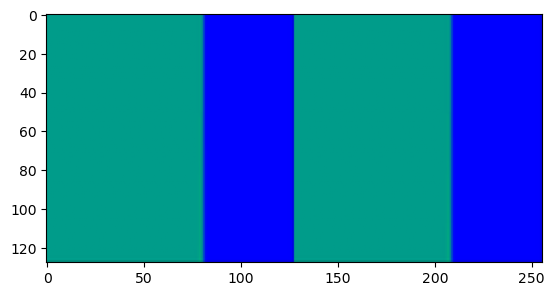

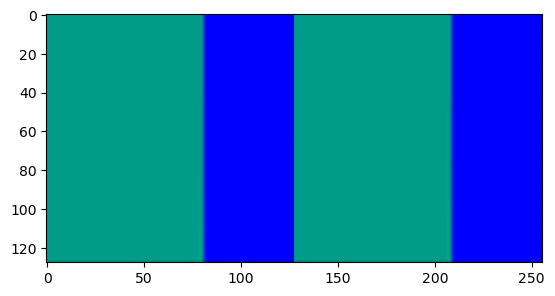

(2395, 128, 256, 3)
(599, 128, 256, 3)


In [9]:
plt.imshow(Bdd_test[298])
plt.show()
plt.close()
plt.imshow(prediction_test[298])
plt.show()
plt.close()
print(Bdd_train.shape)
print(Bdd_test.shape)

In [10]:
prediction_test.shape

(599, 128, 256, 3)

In [8]:
del prediction_test
del prediction_train

## Encoder Decoder



Fonction pour création de modèle

In [11]:
def deconv_sigmoid(outch,kernel_size,stride=1,padding='same'):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  activation='sigmoid', padding='same',strides=stride),
    
    ])
    return convlayer

def deconv_relu(outch,kernel_size,stride=1,padding=1):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  padding='same',strides=stride),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
    return convlayer



In [12]:


#CONSTRUCTION DU MODELE 
deconv_8 = deconv_relu(64,(3,4),stride=(1,2))
deconv_7 = deconv_relu(32,4,stride=2)
deconv_6 = deconv_relu(16,4,stride=2)
deconv_5 = deconv_relu(8,4,stride=2)
deconv_4 = deconv_relu(8,4,stride=2)
deconv_3 = deconv_relu(4,4,stride=2)
deconv_2 = deconv_relu(4,4,stride=2)
deconv_1 = deconv_sigmoid(3,4,stride=2)

predict_8 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_7 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_6 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_5 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_4 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_3 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_2 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')

up_sample_8 = tf.keras.Sequential([      
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(3, 4), activation='sigmoid', padding='same',strides=(1,2),use_bias=False),         
    ])

up_sample_7 =tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_6 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_5 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_4 = tf.keras.Sequential([        
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_3 = tf.keras.Sequential([         
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_2 = tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])



def minigooglenet_functional(width, height, depth, classes):
    inputShape=(height,width,depth)
    chanDim=-1
    inputs=tf.keras.layers.Input(shape=inputShape)

    deconv8_out = deconv_8(inputs)
    predict_8_out = up_sample_8(predict_8(inputs))
    x = tf.keras.layers.Concatenate(axis=3)([deconv8_out, predict_8_out])

    deconv7_out = deconv_7(x)
    predict_7_out = up_sample_7(predict_7(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv7_out, predict_7_out])


    deconv6_out = deconv_6(x)
    predict_6_out = up_sample_6(predict_6(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv6_out, predict_6_out])

    deconv5_out = deconv_5(x)
    predict_5_out = up_sample_5(predict_5(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv5_out, predict_5_out])
    
    deconv4_out = deconv_4(x)
    predict_4_out = up_sample_4(predict_4(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv4_out, predict_4_out])
    
    deconv3_out = deconv_3(x)
    predict_3_out = up_sample_6(predict_3(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv3_out, predict_3_out])
    
    deconv2_out = deconv_2(x)
    predict_2_out = up_sample_2(predict_2(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv2_out, predict_2_out]) 
    
    
    x = deconv_1(x)
    


    model=Model(inputs,x,name="Test")
    return model



2023-08-01 09:53:36.372604: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 09:53:36.375966: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-01 09:53:36.376058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-01 09:53:36.376066: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      


In [14]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 128, 4)        196       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 128, 4)        16        
_________________________________________________________________
activation_7 (Activation)    (None, 64, 128, 4)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 128, 4)        148       
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 128, 4)        16        
_________________________________________________________________
activation_8 (Activation)    (None, 64, 128, 4)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 64, 4)       

Modèle VAEs

In [15]:

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

   

In [16]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [17]:
beta=0.5
class VAE(tf.keras.Model):
    '''
    A VAE model, built from given encoder and decoder
    '''

    version = '1.4'

    def __init__(self, encoder=None, decoder=None, loss_weights=[1,1], **kwargs):
        '''
        VAE instantiation with encoder, decoder and r_loss_factor
        args :
            encoder : Encoder model
            decoder : Decoder model
            loss_weights : Weight of the loss functions: reconstruction_loss and kl_loss
            r_loss_factor : Proportion of reconstruction loss for global loss (0.3)
        return:
            None
        '''
        super(VAE, self).__init__(**kwargs)
        self.encoder      = encoder
        self.decoder      = decoder
        self.loss_weights = loss_weights
        print(f'Fidle VAE is ready :-)  loss_weights={list(self.loss_weights)}')
       
        
    def call(self, inputs):
        '''
        Model forward pass, when we use our model
        args:
            inputs : Model inputs
        return:
            output : Output of the model 
        '''
        z_mean, z_log_var, z = self.encoder(inputs)
        output               = self.decoder(z)
        return output
                
        
    def train_step(self, input): 
        input0,input1 = input
        k1,k2 = self.loss_weights

        with tf.GradientTape() as tape:

            z_mean,z_log_var,z=self.encoder(input0,training=True) 
            reconstruction = self(input0,training=True)
            input32       = tf.cast(input1,dtype=tf.float32)
        
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(input32, reconstruction), axis=(1, 2)
                )
            )
            kl_loss=0

            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = -tf.reduce_mean(kl_loss) * k2

            total_loss = reconstruction_loss + kl_loss
            #total_loss = reconstruction_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        return {
            "loss":     total_loss,
            "r_loss":   reconstruction_loss,
            "kl_loss":  kl_loss,
        }
    
    
    
    def predict(self,inputs):
        '''Our predict function...'''
        z_mean, z_var, z  = self.encoder.predict(inputs)
        outputs           = self.decoder.predict(z)
        return outputs

        
    def save(self,filename):
        '''Save model in 2 part'''
        filename, extension = os.path.splitext(filename)
        self.encoder.save(f'{filename}-encoder.h5')
        self.decoder.save(f'{filename}-decoder.h5')

    
    def reload(self,filename):
        '''Reload a 2 part saved model.'''
        filename, extension = os.path.splitext(filename)
        self.encoder = tf.keras.models.load_model(f'{filename}-encoder.h5', custom_objects={'Sampling': Sampling},compile=False)
        self.decoder = tf.keras.models.load_model(f'{filename}-decoder.h5',compile=False)
        print('Reloaded.')
                
        
    @classmethod
    def about(cls):
        '''Basic whoami method'''
        display(Markdown('<br>**FIDLE 2021 - VAE**'))
        print('Version              :', cls.version)
        print('TensorFlow version   :', tf.__version__)
        print('Keras version        :', tf.keras.__version__)

class SamplingLayer(tf.keras.layers.Layer):
    '''A custom layer that receive (z_mean, z_var) and sample a z vector'''

    def call(self, inputs):
        
        z_mean, z_log_var = inputs
        
        batch_size = tf.shape(z_mean)[0]
        latent_dim = tf.shape(z_mean)[1]
        
        epsilon = tf.keras.backend.random_normal(shape=(batch_size, latent_dim))
        z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        
        return z


log_dir = "logs/" 

In [18]:
#Modèle construit
latent_dim =64
p_x=128
p_y=128


encoder_inputs=tf.keras.layers.Input(shape=(p_x, 2*p_y, 3))
x=tf.keras.layers.Conv2D(4, (4, 4), padding='same', strides=2)(encoder_inputs)
layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(4, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(4, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(4, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(4, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(4, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(8, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(8, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(8, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(8, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(16, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(16, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)



x=tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)

x=tf.keras.layers.Conv2D(64, (3, 4), padding='same', strides=(1,2))(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)
x=tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation(activations.relu)(x)

x=layers.Flatten(name="split")(x)
z_m    = layers.Dense(latent_dim, name="z_m")(x)
z_l = layers.Dense(latent_dim, name="z_l")(x)

z         = Sampling()([z_m, z_l])

encoder = tf.keras.Model(encoder_inputs, [z_m,z_l,z], name="encoder")
encoder.summary()




inputs  = tf.keras.Input(shape=(latent_dim,))
x=layers.Reshape((1,1,64))(inputs)
decoding = minigooglenet_functional(1, 1, 64, 3)
outputs=decoding(x)

decoder = tf.keras.Model(inputs, outputs, name="decoder")
decoder.summary()






  


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 256, 3) 0                                            
______________________________________________________________________________________

In [19]:
train_data = tf.data.Dataset.from_tensor_slices((Bdd_train, prediction_train))
val_data = tf.data.Dataset.from_tensor_slices((Bdd_test, prediction_test))

# The batch size must now be set on the Dataset objects.
# batch_size = 32
BATCH_SIZE=256
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)

# Disable AutoShard.
#options = tf.data.Options()
#options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
#train_data = train_data.with_options(options)
#val_data = val_data.with_options(options)

In [22]:
#Compile et importaiton d'un modèle
epoch=1000
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

train_size=len(Bdd_train)
batch_size=128
initial_learning_rate = 0.0001
final_learning_rate = 0.00006
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

autoencoder = VAE(encoder,decoder, [1.,0.5]) 
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule) 
autoencoder.compile(optimizer=optimizer,loss=tf.keras.losses.MeanSquaredError())
autoencoder.reload("../Modele/Hydro_VAE/Vae_1")

Fidle VAE is ready :-)  loss_weights=[1.0, 0.5]
Reloaded.


In [32]:
encoded_imgs=np.array(autoencoder.encoder(Bdd_test)[0])
decoded_imgs=np.array(autoencoder.decoder(encoded_imgs))


In [33]:
encoded_imgs.shape

(599, 64)

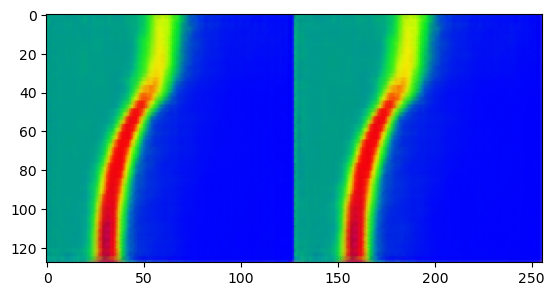

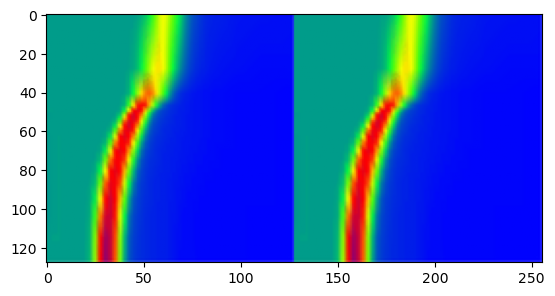

In [26]:
plt.imshow(decoded_imgs[300])
plt.show()
plt.close()
plt.imshow(Bdd_test[300])

# LEVINA BICKEL ALGORITHM

In [37]:
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k


In [38]:
encoded_imgs = np.array(autoencoder.encoder(np.concatenate((Bdd_train,Bdd_test)))[0])
bis=encoded_imgs.reshape(len(Bdd_train)+len(Bdd_test),64)
#bis=encoded_imgs
print(encoded_imgs.shape)
dim = intrinsic_dim_scale_interval(bis,k1=5,k2=100)
print(np.array(dim).mean())

(2994, 64)
1.3972111739849051


## DEUXIEME AUTO ENCODEUR

### On rajoute le reste des images

In [39]:
#Sinus sur TF en custom
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def custom_activation(x):
  
    return (tf.math.sin(30*x))
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [48]:
#Importation bdd pour AE2
encoded_imgs = np.array(autoencoder.encoder(np.concatenate((Bdd_train,Bdd_test))))[0]

Bdd_train_2, Bdd_test_2 = train_test_split(encoded_imgs,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [49]:
#Parametre et variables pour l'initialisation des poids
b=1/float(64)
b0=math.sqrt(6/(64))/30
b1=math.sqrt(6/(128))/30
b2=math.sqrt(6/(64))/30
b3=math.sqrt(6/(32))/30
b4=math.sqrt(6/(4))/30
#kernel_initializer=tf.keras.initializers.RandomUniform(minval=b, maxval=-b)


In [53]:
#Auto encodeur 2 avec latent_dim_2 le resultat approché de LB
latent_dim_2 = 2

class Autoencoder_2(Model):
  def __init__(self, latent_dim_2):
    super(Autoencoder_2, self).__init__()
    self.latent_dim_2 = latent_dim_2
    self.encoder_2 = tf.keras.Sequential([ 
    layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b, maxval=b, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(latent_dim_2,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()),
    ])
    self.decoder_2 = tf.keras.Sequential([
        layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b4, maxval=b4, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()), 
        layers.Dense(128,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    ])
  def call(self, x):
    encoded = self.encoder_2(x)
    decoded = self.decoder_2(encoded)
    return decoded
  
  
autoencoder_2 = Autoencoder_2(latent_dim_2) 


In [29]:
#On charge le modèle
autoencoder_2=tf.keras.models.load_model("../Modele/Hydro_couleur_AE2")

In [55]:

epoch=1000 #epoch pour l'entrainement

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)


train_size=len(Bdd_train_2)
batch_size=128
#Tentative de définition d'une nouvelle erreur via les CallBack

initial_learning_rate = 0.0003
final_learning_rate = 0.0000015
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
    
autoencoder_2.compile(optimizer, loss=losses.MeanSquaredError())

#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history2=autoencoder_2.fit(Bdd_train_2,Bdd_train_2,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test_2, Bdd_test_2), callbacks=[callback,tensorboard_callback],
            )
              


2023-08-01 10:28:53.397733: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-08-01 10:28:53.397794: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-08-01 10:28:53.399630: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-08-01 10:28:53.399829: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/1000
13/19 [===================>..........] - ETA: 0s - loss: 0.7863

2023-08-01 10:28:53.935202: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-08-01 10:28:53.935235: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-08-01 10:28:53.974937: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-08-01 10:28:53.975106: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-08-01 10:28:53.975714: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-08-01 10:28:53.976613: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-08-01 10:28:53.978436: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/train/plugins/profile/2023_08_01_10_28_53
2023-08-01 10:28:53.979550: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped too

19/19 [==============================] - 1s 17ms/step - loss: 0.7847 - val_loss: 0.7546
Epoch 2/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7473 - val_loss: 0.7349
Epoch 3/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7362 - val_loss: 0.7341
Epoch 4/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7286 - val_loss: 0.7307
Epoch 5/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7349 - val_loss: 0.7292
Epoch 6/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7257 - val_loss: 0.7296
Epoch 7/1000
19/19 [==============================] - 0s 9ms/step - loss: 0.7325 - val_loss: 0.7270
Epoch 8/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7194 - val_loss: 0.7074
Epoch 9/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7149 - val_loss: 0.7052
Epoch 10/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.7287 - val_loss: 0.7286
Epoch 11/10

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 66        
Total params: 18,722
Trainable params: 18,722
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                96        
__________________________

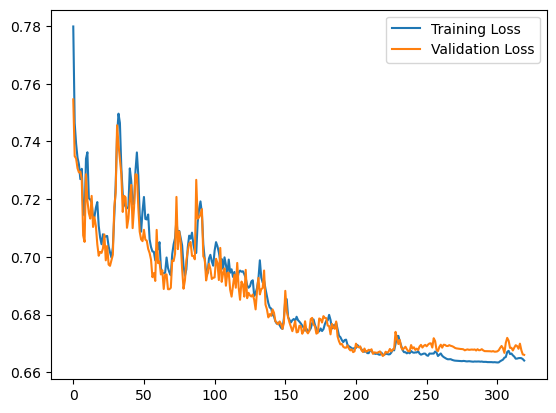

In [56]:
encoded_imgs_2 = autoencoder_2.encoder_2(Bdd_test_2).numpy()
decoded_imgs_2 = autoencoder_2.decoder_2(encoded_imgs_2).numpy()
autoencoder_2.encoder_2.summary()
autoencoder_2.decoder_2.summary()
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.legend()

Visualisation  dans l'espace latent des simulations

In [66]:
#IMportation bdd pour visulation dans l'espace latent
#Il faut choisir le numero du fichier en bas (folder)
nom_fichier="hydro"
n=1000
size=128
pas=10


Test=[]




folder=4
if folder==0:
    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1003,4)+".gif").convert('RGB')
    image1=image1.resize((128,128),Image.ANTIALIAS)
    image1=np.array(image1)
    image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1004,4)+".gif").convert('RGB')
    image2=image2.resize((128,128),Image.ANTIALIAS)
    image2=np.array(image2)
    Test.append(np.concatenate((image1,image2),axis=1))

    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1004,4)+".gif").convert('RGB')
    image1=image1.resize((128,128),Image.ANTIALIAS)
    image1=np.array(image1)
    image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1005,4)+".gif").convert('RGB')
    image2=image2.resize((128,128),Image.ANTIALIAS)
    image2=np.array(image2)
    Test.append(np.concatenate((image1,image2),axis=1))

    for j in range(1005,2001,pas):
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j+1,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        Test.append(np.concatenate((image1,image2),axis=1))
else:
    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1,4)+".gif").convert('RGB')
    image1=image1.resize((128,128),Image.ANTIALIAS)
    image1=np.array(image1)
    image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2,4)+".gif").convert('RGB')
    image2=image2.resize((128,128),Image.ANTIALIAS)
    image2=np.array(image2)
    Test.append(np.concatenate((image1,image2),axis=1))

    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2,4)+".gif").convert('RGB')
    image1=image1.resize((128,128),Image.ANTIALIAS)
    image1=np.array(image1)
    image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(3,4)+".gif").convert('RGB')
    image2=image2.resize((128,128),Image.ANTIALIAS)
    image2=np.array(image2)
    Test.append(np.concatenate((image1,image2),axis=1))

    for j in range(3,999,pas):
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j+1,4)+".gif").convert('RGB')
        image2=image2.resize((128,128),Image.ANTIALIAS)
        image2=np.array(image2)
        Test.append(np.concatenate((image1,image2),axis=1))

Test=np.array(Test)
Test=Test/255

/tmp/ipykernel_2626473/386350374.py:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/386350374.py:43: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image2=image2.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/386350374.py:48: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/386350374.py:51: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image2=image2.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_2626473/386350374.py:57: DeprecationWarning: ANTIALIAS is deprecated and will be removed 

In [67]:
#Ici je crée Testn le tableau lié à la simulation numero n
Test4=Test

In [105]:
print("Evaluate on test data")
results = autoencoder.evaluate(Test2[:-2], Test2[2:], batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 162ms/step - loss: 0.0042
test loss, test acc: 0.004154088906943798


In [110]:
a=[1,2,3,4,5]
print(a[:-2])

[1, 2, 3]


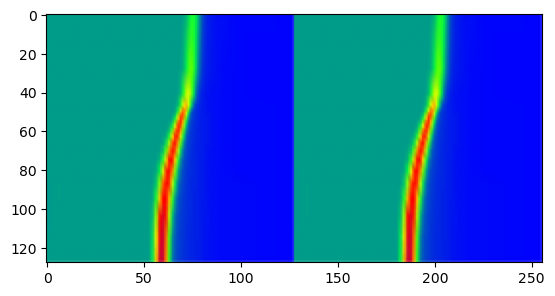

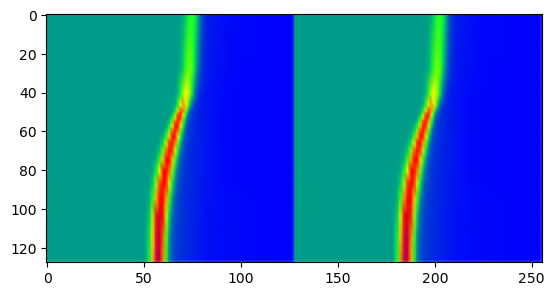

In [111]:
n=30
plt.imshow(Test4[:-2][n])
plt.show()
plt.close()
plt.imshow(Test4[2:][n])
plt.show()
plt.close()

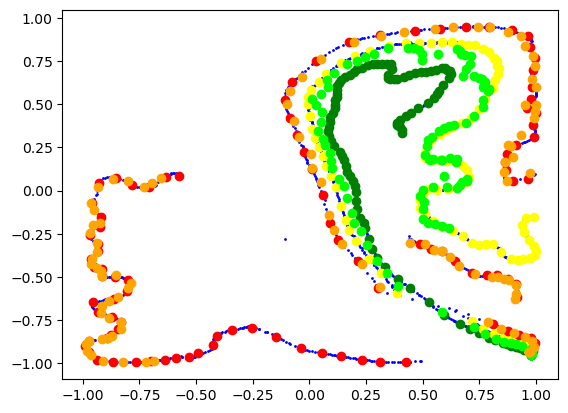

In [98]:
#Il faut créer kes tableaux Testn qui correspondent au simulation des fichiers n 
Bdd_test_3 = np.array(autoencoder_2.encoder_2(Bdd_test_2))
Bdd_train_3 = np.array(autoencoder_2.encoder_2(Bdd_train_2))
Test_reduced=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test0)))
Test_reduced1=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test1)))
Test_reduced2=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test2)))
Test_reduced3=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test3)))
Test_reduced4=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test4)))

Xtr=[]
Ytr=[]
Xte=[]
Yte=[]
X=[]
Y=[]
X1=[]
X2=[]
Y1=[]
Y2=[]
X3=[]
Y3=[]
X4=[]
Y4=[]

for i in range(len(Bdd_test)):
    x=Bdd_test_3[i,0,0,0]
    y=Bdd_test_3[i,0,0,1]
    Xte.append(x)
    Yte.append(y)
for i in range(len(Bdd_train)):
    x=Bdd_train_3[i,0,0,0]
    y=Bdd_train_3[i,0,0,1]
    Xtr.append(x)
    Ytr.append(y)

for i in range(len(Test)):
    x=Test_reduced[i,0,0,0]
    y=Test_reduced[i,0,0,1]
    X.append(x)
    Y.append(y)

for i in range(len(Test1)):
    x=Test_reduced1[i,0,0,0]
    y=Test_reduced1[i,0,0,1]
    X1.append(x)
    Y1.append(y)

for i in range(len(Test2)):
    x=Test_reduced2[i,0,0,0]
    y=Test_reduced2[i,0,0,1]
    X2.append(x)
    Y2.append(y)

for i in range(len(Test3)):
    x=Test_reduced3[i,0,0,0]
    y=Test_reduced3[i,0,0,1]
    X3.append(x)
    Y3.append(y)

for i in range(len(Test4)):
    x=Test_reduced4[i,0,0,0]
    y=Test_reduced4[i,0,0,1]
    X4.append(x)
    Y4.append(y)

plt.scatter(Xte,Yte,color='blue',s=1)
plt.scatter(Xtr,Ytr,color='blue',s=1)
plt.scatter(X,Y,color='green')
plt.scatter(X1,Y1,color='yellow')
plt.scatter(X2,Y2,color='red')
plt.scatter(X3,Y3,color='lime')
plt.scatter(X4,Y4,color='orange')


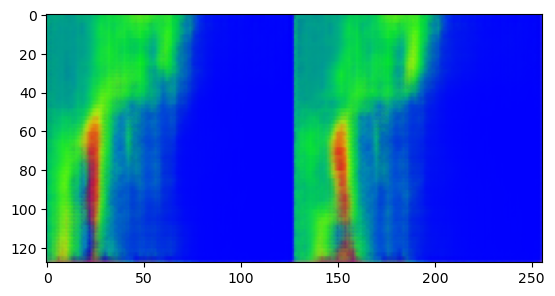

In [69]:
#FOnction qui a partir de x et y donne l'image correspondante au decodage de uvecteur [x,y]
def Image(x,y):
    Image=np.array([[[[x,y]]]])
    decodage_2=np.array(autoencoder_2.decoder_2(Image))
    Res=autoencoder.decoder(decodage_2[0,0])
    return(np.array(Res[0]))

plt.imshow(Image(0,0))

maillage espace latent

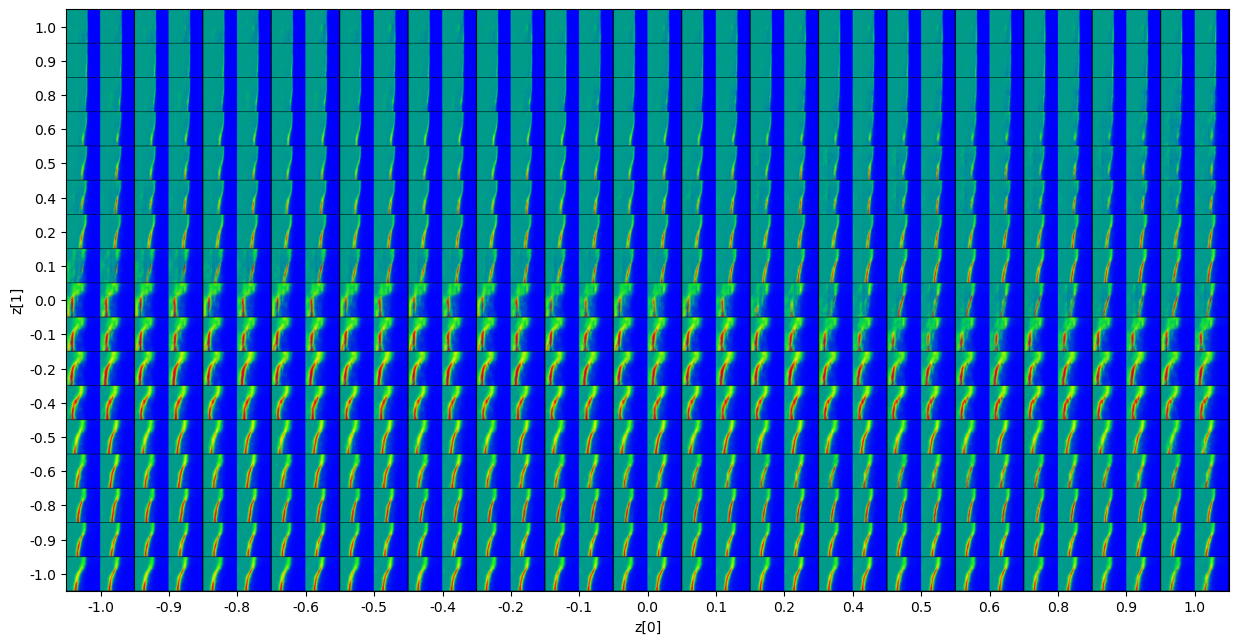

In [70]:
#Fonction pour mailler l'espace latent avec une taille 17x17
def plot_latent_space(ae, n=17, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 128
    scale = 1.0
    figure = np.zeros((digit_size * n, 2*digit_size * n,3))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            x_decoded=Image(xi,yi)
            digit = x_decoded
            digit[:,0,:]=0
            digit[:,1,:]=0
            digit[:,2*digit_size-2,:]=0
            digit[:,2*digit_size-1,:]=0
            digit[0,:,:]=0
            digit[digit_size-1,:,:]=0

          
            figure[
                i * digit_size : (i + 1) * digit_size,
                2*j * digit_size : 2*(j + 1) * digit_size,:
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(2*pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure,cmap='inferno')
    plt.show()


plot_latent_space(autoencoder_2)

ANimation espace latent

In [74]:
#Fonction qui crée la double image Espace latent actualisé + Image correspondante du phénomène physique
#Il faut donner :
# Bdd_image : Image la simulation considérée
#Bdd Vecteur latent de la simulation considérée
#Bdd_train1 les vecteurs latents de toute la base de données train (Intensités connus)
#Bdd_test1 les vecteurs latents de toute la base de données de test (Intensités connus)
#long_terme=True *NOn disponible dans ce code* optionnel, pour afficher les predictions 
#stabilisation=True *NOn disponible dans ce code* optionnel, pour que les prédictions soient stabilisée

def create_images_parcours_AE2(Bdd_image,Bdd,Bdd_train1,Bdd_test1,long_terme=True,stabilisation=True):
    #Créer la figure
    plt.ion
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    latent_pca_2=autoencoder_2.encoder_2(np.array(np.concatenate((Bdd_train1,Bdd_test1,Bdd),axis=0)))
    

    #axes[1].imshow(image, cmap='gray')
    Xte=[]
    Yte=[]
    X1=[]
    Y1=[]


     
    Serie=[]
    #Images=np.array(autoencoder.decoder(Bdd))
    Images=Bdd_image

    n=len(Bdd_test1)+len(Bdd_train1)
    n1=n+len(Bdd)
            

    for i in range(n):
        x=latent_pca_2[i,0]
        y=latent_pca_2[i,1]
        Xte.append(x)
        Yte.append(y)
    

    for i in range(n,n1):
        x=latent_pca_2[i,0]
        y=latent_pca_2[i,1]
        X1.append(x)
        Y1.append(y)

    axes[0].scatter(Xte,Yte,color='blue',s=1)

    image = axes[1].imshow(Images[0],cmap='gray')
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)

    n=len(Bdd)

    print("Creation des images\n")
    for i in range(n-1):
        axes[0].scatter(X1[i:i+1],Y1[i:i+1],color='red')
        image.set_data(Images[i])
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.savefig("../Images/"+str(i)+".png")



    axes[0].scatter(X1[(n-1):],Y1[(n-1):],color='red',marker='x')
    image.set_data(Images[n-1])
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.savefig("../Images/"+str(n-1)+".png")


    print("Creation du gif")

    
#Creation du gif a partir de l'adresse de sauvegarde de la fonction précédente (create_image_parcours_AE2)

   
def create_gif(file,taille):
    fig=plt.figure(figsize=(20,10))
    ims=[]
    
    for i in range(0,taille):
        Pendule=mpimg.imread(file+str(i)+".png")
        plt.axis('off')
        im=plt.imshow(Pendule,animated=True,cmap='gray')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10000)

    ani.save('latent_pred.gif')
    plt.show()
   



Creation des images

Creation du gif


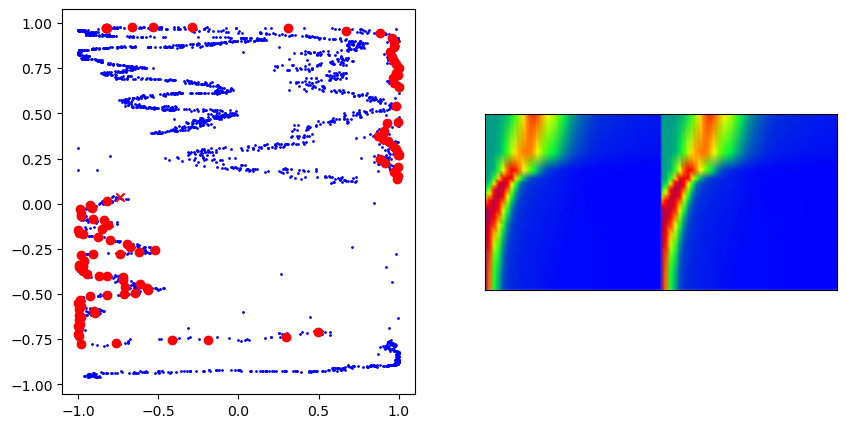

In [81]:
#Creation de tous les gifs pour les différentes animations

Bdd_test_2=np.array(autoencoder.encoder(Bdd_test))[0]
Bdd_train_2=np.array(autoencoder.encoder(Bdd_train))[0]
Test_2=np.array(autoencoder.encoder(Test2))[0]
create_images_parcours_AE2(Test2,Test_2,Bdd_train_2,Bdd_test_2,False,False)

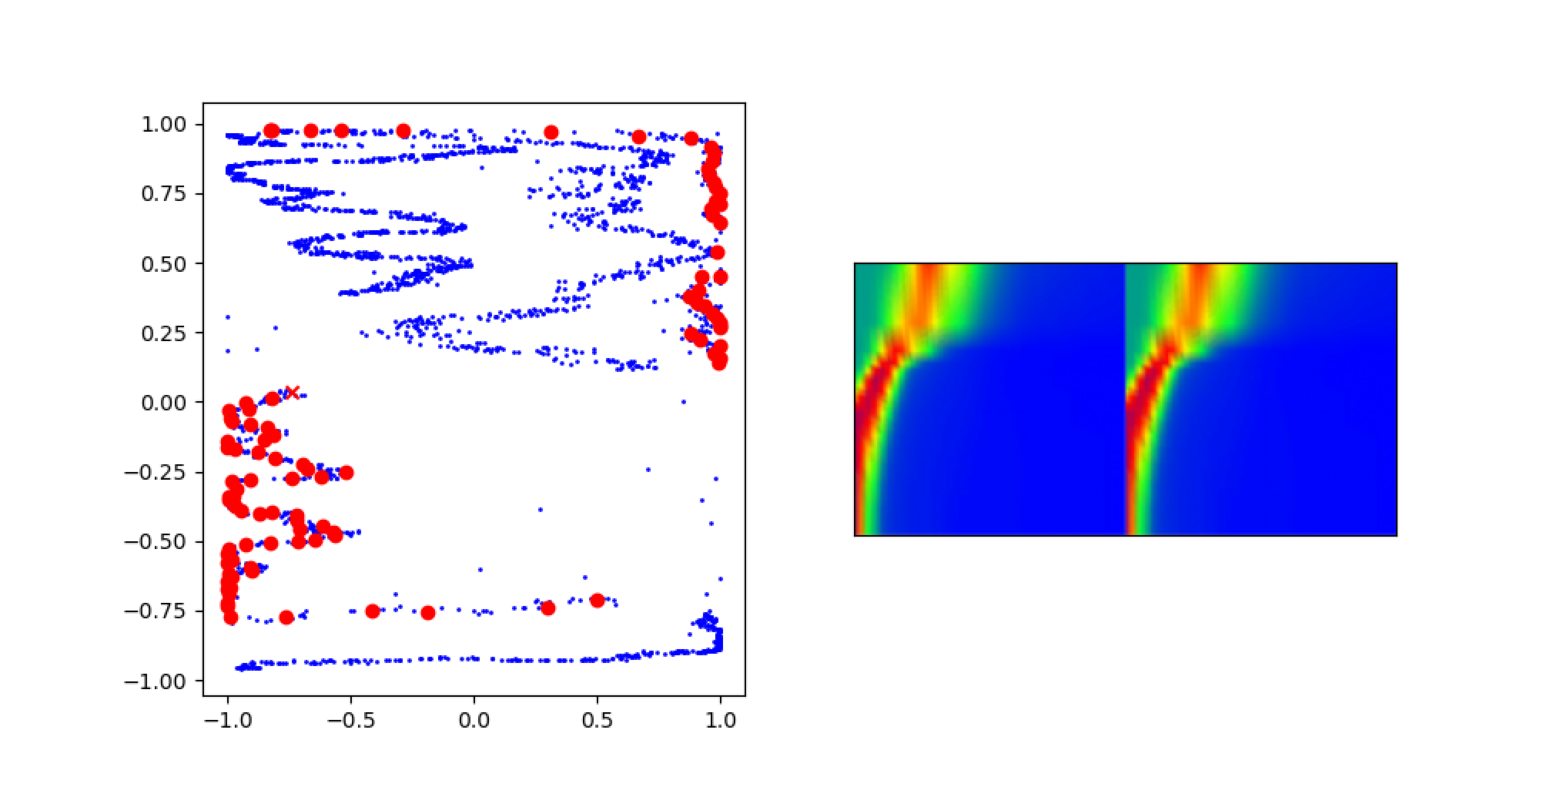

In [82]:
create_gif("../Images/",len(Test2))